In [ ]:

# Import necessary libraries
import pandas as pd
import numpy as np
from Bio import SeqIO
from Bio.Seq import Seq
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

print("Libraries imported successfully")


Libraries imported successfully


In [ ]:

# Load the short_hybrid_competitive_4.0 library
comp_4_df = pd.read_csv('short_hybrid_competitive_4.0_designs.csv')

print(f"Loaded competitive 4.0 library: {comp_4_df.shape}")
print(f"\nColumn names: {list(comp_4_df.columns)}")
print(f"\nFirst 5 rows:")
comp_4_df.head()


Loaded competitive 4.0 library: (621, 14)

Column names: ['Scaffold', 'Loop_Position', 'Loop_Range', 'Original_Parent', 'Triple_Mutant_Parent', 'Motif', 'Motif_Length', 'Mutation_Type', 'New_Mutation_Position', 'Original_AA', 'New_AA', 'Design_Sequence', 'Passes_Novelty', 'MJ_Score']

First 5 rows:


,Scaffold,Loop_Position,Loop_Range,Original_Parent,Triple_Mutant_Parent,Motif,Motif_Length,Mutation_Type,New_Mutation_Position,Original_AA,New_AA,Design_Sequence,Passes_Novelty,MJ_Score
0,1FNA,1,60-68,QGIIDYLSW,QGIINFLAW,QGMINFLAW,9,Quadruple,2,I,M,RDLEVVAATPTSLLISWDAPAVTVRYYRITYGETGGNSPVQEFTVPGSKSTATISGLKPQGMINFLAWAVTGRGDSPASSKPISINYRT,True,-867.53
1,2QMT,2,30-38,QGIIDYLSW,QGIINFLAW,QGMINFLAW,9,Quadruple,2,I,M,MQYKLILNGKTLKGETTTEAVDAATAEKVQGMINFLAWVDGEWTYDDATKTFTVTE,True,-867.53
2,2QMT,1,45-53,QGIIDYLSW,QGIINFLAW,QGMINFLAW,9,Quadruple,2,I,M,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTQGMINFLAWVTE,True,-867.53
3,1TEN,3,26-34,QGIIDYLSW,QGIINFLAW,QGMINFLAW,9,Quadruple,2,I,M,RLDAPSQIEVKDVTDTTALITWFKPQGMINFLAWTYGIKDVPGDRTTIDGKKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGG,True,-867.53
4,1TEN,2,40-48,QGIIDYLSW,QGIINFLAW,QGMINFLAW,9,Quadruple,2,I,M,RLDAPSQIEVKDVTDTTALITWFKPLAEIDGIELTYGIKQGMINFLAWDGKKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGG,True,-867.53


In [ ]:

# Check score distribution and identify the best score
print(f"Score statistics for competitive 4.0 library:")
print(comp_4_df['MJ_Score'].describe())
print(f"\nBest (most favorable) score: {comp_4_df['MJ_Score'].min()}")
print(f"Number of designs at best score: {(comp_4_df['MJ_Score'] == comp_4_df['MJ_Score'].min()).sum()}")
print(f"\nScore barrier to beat: -867.53")

# Identify top 5 unique motifs
top_motifs = comp_4_df.nsmallest(100, 'MJ_Score')['Motif'].unique()[:5]
print(f"\nTop 5 unique motifs (by best score):")
for i, motif in enumerate(top_motifs, 1):
    count = (comp_4_df['Motif'] == motif).sum()
    best_score = comp_4_df[comp_4_df['Motif'] == motif]['MJ_Score'].min()
    print(f"{i}. {motif} (n={count}, best_score={best_score})")


Score statistics for competitive 4.0 library:
count    621.000000
mean    -853.123188
std        7.814337
min     -867.530000
25%     -859.700000
50%     -853.370000
75%     -848.250000
max     -826.270000
Name: MJ_Score, dtype: float64

Best (most favorable) score: -867.53
Number of designs at best score: 9

Score barrier to beat: -867.53

Top 5 unique motifs (by best score):
1. QGMINFLAW (n=9, best_score=-867.53)
2. QGIMNFLAW (n=9, best_score=-867.5299999999997)
3. QGLINFLAW (n=9, best_score=-867.4100000000001)
4. QGILNFLAW (n=9, best_score=-867.41)
5. RGMIDFLAW (n=9, best_score=-861.92)


In [ ]:

# For each top motif, identify the parent sequences and mutation history
print("Analyzing mutation history for top 5 motifs:\n")

for i, motif in enumerate(top_motifs, 1):
    motif_data = comp_4_df[comp_4_df['Motif'] == motif].iloc[0]
    original = motif_data['Original_Parent']
    triple = motif_data['Triple_Mutant_Parent']
    quad = motif
    
    print(f"{i}. Motif: {motif}")
    print(f"   Original:  {original}")
    print(f"   Triple:    {triple}")
    print(f"   Quadruple: {quad}")
    
    # Identify mutated positions
    mutated_positions = []
    for j, (orig, quad_aa) in enumerate(zip(original, quad)):
        if orig != quad_aa:
            mutated_positions.append(j)
    
    # Identify unmutated positions
    unmutated_positions = [j for j in range(len(original)) if j not in mutated_positions]
    
    print(f"   Mutated positions (0-indexed): {mutated_positions}")
    print(f"   Mutations: {', '.join([f'{original[p]}{p}{quad[p]}' for p in mutated_positions])}")
    print(f"   Unmutated positions: {unmutated_positions}")
    print(f"   Unmutated residues: {', '.join([f'{original[p]}{p}' for p in unmutated_positions])}")
    print()


Analyzing mutation history for top 5 motifs:

1. Motif: QGMINFLAW
   Original:  QGIIDYLSW
   Triple:    QGIINFLAW
   Quadruple: QGMINFLAW
   Mutated positions (0-indexed): [2, 4, 5, 7]
   Mutations: I2M, D4N, Y5F, S7A
   Unmutated positions: [0, 1, 3, 6, 8]
   Unmutated residues: Q0, G1, I3, L6, W8

2. Motif: QGIMNFLAW
   Original:  QGIIDYLSW
   Triple:    QGIINFLAW
   Quadruple: QGIMNFLAW
   Mutated positions (0-indexed): [3, 4, 5, 7]
   Mutations: I3M, D4N, Y5F, S7A
   Unmutated positions: [0, 1, 2, 6, 8]
   Unmutated residues: Q0, G1, I2, L6, W8

3. Motif: QGLINFLAW
   Original:  QGIIDYLSW
   Triple:    QGIINFLAW
   Quadruple: QGLINFLAW
   Mutated positions (0-indexed): [2, 4, 5, 7]
   Mutations: I2L, D4N, Y5F, S7A
   Unmutated positions: [0, 1, 3, 6, 8]
   Unmutated residues: Q0, G1, I3, L6, W8

4. Motif: QGILNFLAW
   Original:  QGIIDYLSW
   Triple:    QGIINFLAW
   Quadruple: QGILNFLAW
   Mutated positions (0-indexed): [3, 4, 5, 7]
   Mutations: I3L, D4N, Y5F, S7A
   Unmutated posi

In [ ]:

# Generate non-conservative mutants for each of the top 5 motifs
# Non-conservative substitutions: W (Trp), Y (Tyr), K (Lys), R (Arg)

non_conservative_residues = ['W', 'Y', 'K', 'R']

# Store all new motifs with metadata
new_motifs_data = []

for motif in top_motifs:
    # Get motif data
    motif_data = comp_4_df[comp_4_df['Motif'] == motif].iloc[0]
    original = motif_data['Original_Parent']
    triple = motif_data['Triple_Mutant_Parent']
    
    # Identify mutated positions
    mutated_positions = []
    for j, (orig, quad_aa) in enumerate(zip(original, motif)):
        if orig != quad_aa:
            mutated_positions.append(j)
    
    # Identify unmutated positions
    unmutated_positions = [j for j in range(len(original)) if j not in mutated_positions]
    
    print(f"\nGenerating non-conservative mutants for: {motif}")
    print(f"  Unmutated positions: {unmutated_positions}")
    
    # For each unmutated position, introduce each non-conservative residue
    for pos in unmutated_positions:
        original_aa = motif[pos]
        
        for new_aa in non_conservative_residues:
            # Skip if it's already the same residue
            if original_aa == new_aa:
                continue
            
            # Create new motif
            new_motif = list(motif)
            new_motif[pos] = new_aa
            new_motif_str = ''.join(new_motif)
            
            # Store metadata
            new_motifs_data.append({
                'Parent_Motif': motif,
                'Original_Parent': original,
                'Triple_Mutant_Parent': triple,
                'New_Motif': new_motif_str,
                'Motif_Length': len(new_motif_str),
                'Mutation_Position': pos,
                'Original_AA': original_aa,
                'New_AA': new_aa,
                'Mutation_Type': 'Non-Conservative',
                'Generation': '5.0_NonConservative'
            })

print(f"\n\nTotal new motifs generated: {len(new_motifs_data)}")

# Create dataframe
new_motifs_df = pd.DataFrame(new_motifs_data)
print(f"\nFirst 10 new motifs:")
new_motifs_df.head(10)



Generating non-conservative mutants for: QGMINFLAW
  Unmutated positions: [0, 1, 3, 6, 8]

Generating non-conservative mutants for: QGIMNFLAW
  Unmutated positions: [0, 1, 2, 6, 8]

Generating non-conservative mutants for: QGLINFLAW
  Unmutated positions: [0, 1, 3, 6, 8]

Generating non-conservative mutants for: QGILNFLAW
  Unmutated positions: [0, 1, 2, 6, 8]

Generating non-conservative mutants for: RGMIDFLAW
  Unmutated positions: [1, 3, 4, 6, 8]


Total new motifs generated: 95

First 10 new motifs:


,Parent_Motif,Original_Parent,Triple_Mutant_Parent,New_Motif,Motif_Length,Mutation_Position,Original_AA,New_AA,Mutation_Type,Generation
0,QGMINFLAW,QGIIDYLSW,QGIINFLAW,WGMINFLAW,9,0,Q,W,Non-Conservative,5.0_NonConservative
1,QGMINFLAW,QGIIDYLSW,QGIINFLAW,YGMINFLAW,9,0,Q,Y,Non-Conservative,5.0_NonConservative
2,QGMINFLAW,QGIIDYLSW,QGIINFLAW,KGMINFLAW,9,0,Q,K,Non-Conservative,5.0_NonConservative
3,QGMINFLAW,QGIIDYLSW,QGIINFLAW,RGMINFLAW,9,0,Q,R,Non-Conservative,5.0_NonConservative
4,QGMINFLAW,QGIIDYLSW,QGIINFLAW,QWMINFLAW,9,1,G,W,Non-Conservative,5.0_NonConservative
5,QGMINFLAW,QGIIDYLSW,QGIINFLAW,QYMINFLAW,9,1,G,Y,Non-Conservative,5.0_NonConservative
6,QGMINFLAW,QGIIDYLSW,QGIINFLAW,QKMINFLAW,9,1,G,K,Non-Conservative,5.0_NonConservative
7,QGMINFLAW,QGIIDYLSW,QGIINFLAW,QRMINFLAW,9,1,G,R,Non-Conservative,5.0_NonConservative
8,QGMINFLAW,QGIIDYLSW,QGIINFLAW,QGMWNFLAW,9,3,I,W,Non-Conservative,5.0_NonConservative
9,QGMINFLAW,QGIIDYLSW,QGIINFLAW,QGMYNFLAW,9,3,I,Y,Non-Conservative,5.0_NonConservative


In [ ]:

# Check for unique new motifs
unique_new_motifs = new_motifs_df['New_Motif'].nunique()
print(f"Total new motifs generated: {len(new_motifs_data)}")
print(f"Unique new motifs: {unique_new_motifs}")

# Check if any of these motifs already exist in the 4.0 library
existing_in_4_0 = new_motifs_df['New_Motif'].isin(comp_4_df['Motif'])
print(f"\nMotifs already in 4.0 library: {existing_in_4_0.sum()}")

if existing_in_4_0.sum() > 0:
    print("Existing motifs:")
    print(new_motifs_df[existing_in_4_0]['New_Motif'].unique())
    
# Remove duplicates (keep first occurrence)
new_motifs_df_unique = new_motifs_df.drop_duplicates(subset='New_Motif', keep='first')
print(f"\nUnique new motifs after deduplication: {len(new_motifs_df_unique)}")


Total new motifs generated: 95
Unique new motifs: 95

Motifs already in 4.0 library: 0

Unique new motifs after deduplication: 95


In [ ]:

# Now graft each motif onto the three scaffolds and create full designs
# Scaffolds: 1FNA, 1TEN, 2QMT
# We need to load the scaffold information from the 4.0 library

# Get unique scaffold-loop combinations from the 4.0 library
scaffold_info = comp_4_df[['Scaffold', 'Loop_Position', 'Loop_Range']].drop_duplicates()
print(f"Scaffold-loop combinations: {len(scaffold_info)}")
print(scaffold_info)


Scaffold-loop combinations: 9
  Scaffold  Loop_Position Loop_Range
0     1FNA              1      60-68
1     2QMT              2      30-38
2     2QMT              1      45-53
3     1TEN              3      26-34
4     1TEN              2      40-48
5     1TEN              1      56-64
6     1FNA              3      35-43
7     1FNA              2      50-58
8     2QMT              3      17-25


In [ ]:

# Load PDB files to get scaffold sequences
# We'll extract scaffold sequences from the 4.0 library instead

def extract_scaffold_sequence(row):
    """Extract scaffold sequence from a design by removing the motif"""
    design_seq = row['Design_Sequence']
    motif = row['Motif']
    loop_range = row['Loop_Range']
    
    # Parse loop range
    start, end = map(int, loop_range.split('-'))
    
    return design_seq, start, end

# Get one example for each scaffold-loop combination
scaffold_sequences = {}
for _, row in scaffold_info.iterrows():
    scaffold = row['Scaffold']
    loop_pos = row['Loop_Position']
    loop_range = row['Loop_Range']
    
    # Find a design with this scaffold-loop combination
    example = comp_4_df[
        (comp_4_df['Scaffold'] == scaffold) & 
        (comp_4_df['Loop_Position'] == loop_pos)
    ].iloc[0]
    
    design_seq = example['Design_Sequence']
    motif = example['Motif']
    
    # Find where the motif is in the design sequence
    motif_start = design_seq.find(motif)
    
    if motif_start == -1:
        print(f"Warning: Could not find motif {motif} in design sequence")
        continue
    
    # Extract prefix and suffix
    prefix = design_seq[:motif_start]
    suffix = design_seq[motif_start + len(motif):]
    
    key = (scaffold, loop_pos, loop_range)
    scaffold_sequences[key] = {
        'prefix': prefix,
        'suffix': suffix,
        'motif_start': motif_start,
        'motif_length': len(motif)
    }

print(f"Extracted scaffold templates: {len(scaffold_sequences)}")
for key, val in list(scaffold_sequences.items())[:3]:
    print(f"\n{key}:")
    print(f"  Prefix length: {len(val['prefix'])}")
    print(f"  Suffix length: {len(val['suffix'])}")


Extracted scaffold templates: 9

('1FNA', 1, '60-68'):
  Prefix length: 59
  Suffix length: 21

('2QMT', 2, '30-38'):
  Prefix length: 29
  Suffix length: 18

('2QMT', 1, '45-53'):
  Prefix length: 44
  Suffix length: 3


In [ ]:

# Create full designs by grafting each new motif onto each scaffold
designs_data = []

for _, motif_row in new_motifs_df_unique.iterrows():
    new_motif = motif_row['New_Motif']
    
    # Graft onto each scaffold-loop combination
    for key, scaffold_data in scaffold_sequences.items():
        scaffold, loop_pos, loop_range = key
        prefix = scaffold_data['prefix']
        suffix = scaffold_data['suffix']
        
        # Create full design sequence
        design_sequence = prefix + new_motif + suffix
        
        # Store design data
        designs_data.append({
            'Scaffold': scaffold,
            'Loop_Position': loop_pos,
            'Loop_Range': loop_range,
            'Original_Parent': motif_row['Original_Parent'],
            'Triple_Mutant_Parent': motif_row['Triple_Mutant_Parent'],
            'Quadruple_Parent': motif_row['Parent_Motif'],
            'Motif': new_motif,
            'Motif_Length': len(new_motif),
            'Mutation_Type': motif_row['Mutation_Type'],
            'Mutation_Position': motif_row['Mutation_Position'],
            'Original_AA': motif_row['Original_AA'],
            'New_AA': motif_row['New_AA'],
            'Design_Sequence': design_sequence,
            'Generation': motif_row['Generation']
        })

designs_df = pd.DataFrame(designs_data)
print(f"Total designs created: {len(designs_df)}")
print(f"Unique motifs: {designs_df['Motif'].nunique()}")
print(f"Designs per motif: {len(designs_df) / designs_df['Motif'].nunique()}")
print(f"\nFirst 5 designs:")
designs_df.head()


Total designs created: 855
Unique motifs: 95
Designs per motif: 9.0

First 5 designs:


,Scaffold,Loop_Position,Loop_Range,Original_Parent,Triple_Mutant_Parent,Quadruple_Parent,Motif,Motif_Length,Mutation_Type,Mutation_Position,Original_AA,New_AA,Design_Sequence,Generation
0,1FNA,1,60-68,QGIIDYLSW,QGIINFLAW,QGMINFLAW,WGMINFLAW,9,Non-Conservative,0,Q,W,RDLEVVAATPTSLLISWDAPAVTVRYYRITYGETGGNSPVQEFTVPGSKSTATISGLKPWGMINFLAWAVTGRGDSPASSKPISINYRT,5.0_NonConservative
1,2QMT,2,30-38,QGIIDYLSW,QGIINFLAW,QGMINFLAW,WGMINFLAW,9,Non-Conservative,0,Q,W,MQYKLILNGKTLKGETTTEAVDAATAEKVWGMINFLAWVDGEWTYDDATKTFTVTE,5.0_NonConservative
2,2QMT,1,45-53,QGIIDYLSW,QGIINFLAW,QGMINFLAW,WGMINFLAW,9,Non-Conservative,0,Q,W,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTWGMINFLAWVTE,5.0_NonConservative
3,1TEN,3,26-34,QGIIDYLSW,QGIINFLAW,QGMINFLAW,WGMINFLAW,9,Non-Conservative,0,Q,W,RLDAPSQIEVKDVTDTTALITWFKPWGMINFLAWTYGIKDVPGDRTTIDGKKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGG,5.0_NonConservative
4,1TEN,2,40-48,QGIIDYLSW,QGIINFLAW,QGMINFLAW,WGMINFLAW,9,Non-Conservative,0,Q,W,RLDAPSQIEVKDVTDTTALITWFKPLAEIDGIELTYGIKWGMINFLAWDGKKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGG,5.0_NonConservative


In [ ]:

# Now we need to apply novelty filtering using the 10-AA sliding window
# Load known binders and CDR library

# Load known binders
known_binders = []
for record in SeqIO.parse('known_niv_binders_full.fasta', 'fasta'):
    known_binders.append(str(record.seq))

print(f"Loaded {len(known_binders)} known binder sequences")

# Load CDR library
cdr_df = pd.read_csv('cdr_library_summary.csv')
cdr_sequences = cdr_df['Sequence'].tolist()
print(f"Loaded {len(cdr_sequences)} CDR sequences")

# Combine all reference sequences
all_reference_seqs = known_binders + cdr_sequences
print(f"Total reference sequences for novelty check: {len(all_reference_seqs)}")


Loaded 6 known binder sequences
Loaded 12 CDR sequences
Total reference sequences for novelty check: 18


In [ ]:

# Implement 10-AA sliding window novelty check
def check_novelty(sequence, reference_sequences, window_size=10):
    """
    Check if a sequence contains any 10-AA subsequence with 100% identity 
    to any subsequence in reference sequences.
    
    Returns True if novel (passes check), False if fails (contains matching subsequence)
    """
    seq_len = len(sequence)
    
    # Generate all 10-AA windows from the test sequence
    for i in range(seq_len - window_size + 1):
        test_window = sequence[i:i+window_size]
        
        # Check against all reference sequences
        for ref_seq in reference_sequences:
            ref_len = len(ref_seq)
            
            # Check all windows in reference sequence
            for j in range(ref_len - window_size + 1):
                ref_window = ref_seq[j:j+window_size]
                
                if test_window == ref_window:
                    return False  # Found a match, fails novelty
    
    return True  # No matches found, passes novelty

# Apply novelty check to all designs
print("Applying novelty check to all designs...")
designs_df['Passes_Novelty'] = designs_df['Design_Sequence'].apply(
    lambda seq: check_novelty(seq, all_reference_seqs)
)

# Count results
total_designs = len(designs_df)
novel_designs = designs_df['Passes_Novelty'].sum()
failed_designs = total_designs - novel_designs

print(f"\nNovelty filtering results:")
print(f"  Total designs: {total_designs}")
print(f"  Passed novelty: {novel_designs} ({100*novel_designs/total_designs:.1f}%)")
print(f"  Failed novelty: {failed_designs} ({100*failed_designs/total_designs:.1f}%)")


Applying novelty check to all designs...



Novelty filtering results:
  Total designs: 855
  Passed novelty: 855 (100.0%)
  Failed novelty: 0 (0.0%)


In [ ]:

# Filter to only novel designs
novel_designs_df = designs_df[designs_df['Passes_Novelty']].copy()
print(f"Novel designs for MJ scoring: {len(novel_designs_df)}")

# Now we need to implement the MJ scoring function
# For competitive site, we use raw MJ score against the 20-residue epitope
competitive_epitope = "SCSRGVSKQRIIGVGEVLDR"

# Load the Miyazawa-Jernigan statistical potential matrix
# Standard MJ matrix values (in units of kT, more negative = more favorable)
MJ_MATRIX = {
    'C': {'C': -5.44, 'M': -4.99, 'F': -5.80, 'I': -5.50, 'L': -5.83, 'V': -5.72, 'W': -7.28, 'Y': -6.14, 'A': -4.13, 'G': -4.16, 'T': -4.96, 'S': -3.73, 'N': -4.80, 'Q': -5.37, 'D': -4.16, 'E': -3.59, 'H': -4.81, 'R': -2.41, 'K': -2.85, 'P': -3.07},
    'M': {'C': -4.99, 'M': -5.46, 'F': -5.32, 'I': -5.00, 'L': -5.32, 'V': -4.91, 'W': -4.03, 'Y': -4.91, 'A': -3.94, 'G': -3.87, 'T': -3.51, 'S': -3.03, 'N': -2.57, 'Q': -2.85, 'D': -2.32, 'E': -2.24, 'H': -3.98, 'R': -2.57, 'K': -1.73, 'P': -2.03},
    'F': {'C': -5.80, 'M': -5.32, 'F': -6.84, 'I': -6.54, 'L': -6.56, 'V': -6.29, 'W': -6.16, 'Y': -7.26, 'A': -4.81, 'G': -5.23, 'T': -5.28, 'S': -4.02, 'N': -4.68, 'Q': -5.66, 'D': -5.02, 'E': -4.97, 'H': -5.33, 'R': -4.57, 'K': -4.13, 'P': -4.03},
    'I': {'C': -5.50, 'M': -5.00, 'F': -6.54, 'I': -6.05, 'L': -6.84, 'V': -6.48, 'W': -5.78, 'Y': -6.08, 'A': -4.58, 'G': -4.87, 'T': -5.00, 'S': -3.52, 'N': -4.16, 'Q': -4.25, 'D': -3.51, 'E': -3.27, 'H': -4.14, 'R': -3.58, 'K': -3.37, 'P': -3.76},
    'L': {'C': -5.83, 'M': -5.32, 'F': -6.56, 'I': -6.84, 'L': -6.84, 'V': -6.29, 'W': -6.14, 'Y': -6.67, 'A': -4.91, 'G': -4.16, 'T': -4.54, 'S': -4.16, 'N': -4.59, 'Q': -4.54, 'D': -4.03, 'E': -4.03, 'H': -4.25, 'R': -4.03, 'K': -3.37, 'P': -3.98},
    'V': {'C': -5.72, 'M': -4.91, 'F': -6.29, 'I': -6.48, 'L': -6.29, 'V': -6.29, 'W': -6.00, 'Y': -5.75, 'A': -4.04, 'G': -4.16, 'T': -4.52, 'S': -3.63, 'N': -4.25, 'Q': -4.00, 'D': -3.76, 'E': -3.65, 'H': -4.25, 'R': -3.61, 'K': -3.03, 'P': -3.32},
    'W': {'C': -7.28, 'M': -4.03, 'F': -6.16, 'I': -5.78, 'L': -6.14, 'V': -6.00, 'W': -5.93, 'Y': -5.18, 'A': -3.98, 'G': -4.79, 'T': -5.42, 'S': -2.59, 'N': -4.35, 'Q': -4.54, 'D': -3.98, 'E': -5.55, 'H': -3.05, 'R': -3.41, 'K': -3.36, 'P': -4.25},
    'Y': {'C': -6.14, 'M': -4.91, 'F': -7.26, 'I': -6.08, 'L': -6.67, 'V': -5.75, 'W': -5.18, 'Y': -7.96, 'A': -3.36, 'G': -5.14, 'T': -5.18, 'S': -3.73, 'N': -3.98, 'Q': -5.37, 'D': -4.91, 'E': -4.16, 'H': -3.52, 'R': -5.19, 'K': -3.36, 'P': -3.19},
    'A': {'C': -4.13, 'M': -3.94, 'F': -4.81, 'I': -4.58, 'L': -4.91, 'V': -4.04, 'W': -3.98, 'Y': -3.36, 'A': -2.72, 'G': -3.15, 'T': -2.31, 'S': -2.01, 'N': -2.95, 'Q': -2.85, 'D': -2.41, 'E': -2.11, 'H': -3.05, 'R': -2.57, 'K': -1.31, 'P': -1.75},
    'G': {'C': -4.16, 'M': -3.87, 'F': -5.23, 'I': -4.87, 'L': -4.16, 'V': -4.16, 'W': -4.79, 'Y': -5.14, 'A': -3.15, 'G': -3.63, 'T': -3.11, 'S': -2.39, 'N': -3.42, 'Q': -3.98, 'D': -2.85, 'E': -3.19, 'H': -4.16, 'R': -3.59, 'K': -2.24, 'P': -2.03},
    'T': {'C': -4.96, 'M': -3.51, 'F': -5.28, 'I': -5.00, 'L': -4.54, 'V': -4.52, 'W': -5.42, 'Y': -5.18, 'A': -2.31, 'G': -3.11, 'T': -4.03, 'S': -2.67, 'N': -2.59, 'Q': -3.40, 'D': -2.57, 'E': -2.29, 'H': -2.89, 'R': -2.69, 'K': -1.31, 'P': -1.90},
    'S': {'C': -3.73, 'M': -3.03, 'F': -4.02, 'I': -3.52, 'L': -4.16, 'V': -3.63, 'W': -2.59, 'Y': -3.73, 'A': -2.01, 'G': -2.39, 'T': -2.67, 'S': -1.67, 'N': -2.85, 'Q': -2.59, 'D': -1.84, 'E': -1.48, 'H': -2.11, 'R': -2.19, 'K': -0.88, 'P': -1.57},
    'N': {'C': -4.80, 'M': -2.57, 'F': -4.68, 'I': -4.16, 'L': -4.59, 'V': -4.25, 'W': -4.35, 'Y': -3.98, 'A': -2.95, 'G': -3.42, 'T': -2.59, 'S': -2.85, 'N': -3.11, 'Q': -1.84, 'D': -2.41, 'E': -1.29, 'H': -2.95, 'R': -2.29, 'K': -1.84, 'P': -1.53},
    'Q': {'C': -5.37, 'M': -2.85, 'F': -5.66, 'I': -4.25, 'L': -4.54, 'V': -4.00, 'W': -4.54, 'Y': -5.37, 'A': -2.85, 'G': -3.98, 'T': -3.40, 'S': -2.59, 'N': -1.84, 'Q': -3.07, 'D': -1.29, 'E': -0.69, 'H': -2.67, 'R': -1.48, 'K': -0.96, 'P': -2.76},
    'D': {'C': -4.16, 'M': -2.32, 'F': -5.02, 'I': -3.51, 'L': -4.03, 'V': -3.76, 'W': -3.98, 'Y': -4.91, 'A': -2.41, 'G': -2.85, 'T': -2.57, 'S': -1.84, 'N': -2.41, 'Q': -1.29, 'D': -2.59, 'E': 0.06, 'H': -2.67, 'R': -2.29, 'K': -0.69, 'P': -2.76},
    'E': {'C': -3.59, 'M': -2.24, 'F': -4.97, 'I': -3.27, 'L': -4.03, 'V': -3.65, 'W': -5.55, 'Y': -4.16, 'A': -2.11, 'G': -3.19, 'T': -2.29, 'S': -1.48, 'N': -1.29, 'Q': -0.69, 'D': 0.06, 'E': -0.91, 'H': -2.67, 'R': -2.11, 'K': 0.37, 'P': -2.52},
    'H': {'C': -4.81, 'M': -3.98, 'F': -5.33, 'I': -4.14, 'L': -4.25, 'V': -4.25, 'W': -3.05, 'Y': -3.52, 'A': -3.05, 'G': -4.16, 'T': -2.89, 'S': -2.11, 'N': -2.95, 'Q': -2.67, 'D': -2.67, 'E': -2.67, 'H': -3.05, 'R': -2.67, 'K': -1.31, 'P': -2.25},
    'R': {'C': -2.41, 'M': -2.57, 'F': -4.57, 'I': -3.58, 'L': -4.03, 'V': -3.61, 'W': -3.41, 'Y': -5.19, 'A': -2.57, 'G': -3.59, 'T': -2.69, 'S': -2.19, 'N': -2.29, 'Q': -1.48, 'D': -2.29, 'E': -2.11, 'H': -2.67, 'R': -2.41, 'K': 1.68, 'P': -1.70},
    'K': {'C': -2.85, 'M': -1.73, 'F': -4.13, 'I': -3.37, 'L': -3.37, 'V': -3.03, 'W': -3.36, 'Y': -3.36, 'A': -1.31, 'G': -2.24, 'T': -1.31, 'S': -0.88, 'N': -1.84, 'Q': -0.96, 'D': -0.69, 'E': 0.37, 'H': -1.31, 'R': 1.68, 'K': 1.17, 'P': -1.17},
    'P': {'C': -3.07, 'M': -2.03, 'F': -4.03, 'I': -3.76, 'L': -3.98, 'V': -3.32, 'W': -4.25, 'Y': -3.19, 'A': -1.75, 'G': -2.03, 'T': -1.90, 'S': -1.57, 'N': -1.53, 'Q': -2.76, 'D': -2.76, 'E': -2.52, 'H': -2.25, 'R': -1.70, 'K': -1.17, 'P': -0.66}
}

print("MJ matrix loaded successfully")
print(f"Competitive epitope: {competitive_epitope}")


Novel designs for MJ scoring: 855
MJ matrix loaded successfully
Competitive epitope: SCSRGVSKQRIIGVGEVLDR


In [ ]:

# Implement MJ scoring function for competitive epitope
def calculate_raw_mj_score(motif_sequence, epitope_sequence, mj_matrix):
    """
    Calculate raw MJ interaction score between motif and epitope.
    Sum all pairwise interactions between residues.
    
    Returns the total MJ score (more negative = more favorable)
    """
    total_score = 0.0
    
    for motif_aa in motif_sequence:
        for epitope_aa in epitope_sequence:
            # Skip if amino acid not in matrix
            if motif_aa not in mj_matrix or epitope_aa not in mj_matrix[motif_aa]:
                continue
            
            # Add interaction energy
            total_score += mj_matrix[motif_aa][epitope_aa]
    
    return total_score

# Calculate MJ scores for all novel designs
print("Calculating MJ scores for all novel designs...")
novel_designs_df['MJ_Score'] = novel_designs_df['Motif'].apply(
    lambda motif: calculate_raw_mj_score(motif, competitive_epitope, MJ_MATRIX)
)

print(f"\nMJ scoring complete!")
print(f"Score range: {novel_designs_df['MJ_Score'].min():.2f} to {novel_designs_df['MJ_Score'].max():.2f}")
print(f"\nScore statistics:")
print(novel_designs_df['MJ_Score'].describe())


Calculating MJ scores for all novel designs...

MJ scoring complete!
Score range: -788.54 to -630.55

Score statistics:
count    855.000000
mean    -712.496526
std       38.638984
min     -788.540000
25%     -743.150000
50%     -712.820000
75%     -680.270000
max     -630.550000
Name: MJ_Score, dtype: float64


In [ ]:

# Check if any designs beat the score barrier of -867.53
barrier_score = -867.53
best_score = novel_designs_df['MJ_Score'].min()

print(f"Score barrier to beat: {barrier_score}")
print(f"Best score in new library: {best_score:.2f}")
print(f"Difference: {best_score - barrier_score:.2f}")

if best_score < barrier_score:
    print(f"\n✓ SUCCESS: New library breaks the barrier!")
    print(f"Number of designs better than barrier: {(novel_designs_df['MJ_Score'] < barrier_score).sum()}")
    
    # Show top designs
    print(f"\nTop 10 designs:")
    top_designs = novel_designs_df.nsmallest(10, 'MJ_Score')[['Motif', 'Quadruple_Parent', 'New_AA', 
                                                                'Mutation_Position', 'Scaffold', 'MJ_Score']]
    print(top_designs.to_string(index=False))
else:
    print(f"\n✗ FAILURE: New library does NOT break the barrier")
    print(f"The best score is {abs(best_score - barrier_score):.2f} worse (less favorable) than the barrier")
    print(f"All scores are WORSE than the 4.0 generation")


Score barrier to beat: -867.53
Best score in new library: -788.54
Difference: 78.99

✗ FAILURE: New library does NOT break the barrier
The best score is 78.99 worse (less favorable) than the barrier
All scores are WORSE than the 4.0 generation


In [ ]:

# Perform statistical comparison between the 4.0 and new non-conservative library
# Compare score distributions

# Get scores from both libraries
scores_4_0 = comp_4_df['MJ_Score'].values
scores_noncons = novel_designs_df['MJ_Score'].values

# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(scores_4_0, scores_noncons)

# Also perform Mann-Whitney U test (non-parametric alternative)
u_stat, p_value_mw = stats.mannwhitneyu(scores_4_0, scores_noncons, alternative='two-sided')

# Calculate effect size (Cohen's d)
mean_diff = np.mean(scores_4_0) - np.mean(scores_noncons)
pooled_std = np.sqrt((np.std(scores_4_0)**2 + np.std(scores_noncons)**2) / 2)
cohens_d = mean_diff / pooled_std

print("Statistical Comparison: 4.0 vs Non-Conservative 1.0")
print("=" * 60)
print(f"\n4.0 Library (n={len(scores_4_0)}):")
print(f"  Mean: {np.mean(scores_4_0):.2f} ± {np.std(scores_4_0):.2f}")
print(f"  Median: {np.median(scores_4_0):.2f}")
print(f"  Range: [{np.min(scores_4_0):.2f}, {np.max(scores_4_0):.2f}]")

print(f"\nNon-Conservative 1.0 Library (n={len(scores_noncons)}):")
print(f"  Mean: {np.mean(scores_noncons):.2f} ± {np.std(scores_noncons):.2f}")
print(f"  Median: {np.median(scores_noncons):.2f}")
print(f"  Range: [{np.min(scores_noncons):.2f}, {np.max(scores_noncons):.2f}]")

print(f"\nDifference:")
print(f"  Mean difference: {mean_diff:.2f}")
print(f"  Effect size (Cohen's d): {cohens_d:.2f}")

print(f"\nStatistical Tests:")
print(f"  T-test: t={t_stat:.2f}, p={p_value:.2e}")
print(f"  Mann-Whitney U: U={u_stat:.2f}, p={p_value_mw:.2e}")

if p_value < 0.001:
    print(f"\n  *** HIGHLY SIGNIFICANT DIFFERENCE (p < 0.001) ***")
    if mean_diff > 0:
        print(f"  The 4.0 library has SIGNIFICANTLY MORE FAVORABLE scores")
    else:
        print(f"  The Non-Conservative library has significantly more favorable scores")


Statistical Comparison: 4.0 vs Non-Conservative 1.0

4.0 Library (n=621):
  Mean: -853.12 ± 7.81
  Median: -853.37
  Range: [-867.53, -826.27]

Non-Conservative 1.0 Library (n=855):
  Mean: -712.50 ± 38.62
  Median: -712.82
  Range: [-788.54, -630.55]

Difference:
  Mean difference: -140.63
  Effect size (Cohen's d): -5.05

Statistical Tests:
  T-test: t=-89.37, p=0.00e+00
  Mann-Whitney U: U=0.00, p=1.53e-236

  *** HIGHLY SIGNIFICANT DIFFERENCE (p < 0.001) ***
  The Non-Conservative library has significantly more favorable scores


In [ ]:

# Wait - there's an issue here. The statistical test says Non-Conservative is "more favorable"
# but the raw scores show the opposite. Let me check the interpretation.

# In MJ potential, MORE NEGATIVE = MORE FAVORABLE
# 4.0 mean: -853.12 (very negative = very favorable)
# Non-Conservative mean: -712.50 (less negative = less favorable)

# The mean_diff is negative because we subtracted a smaller magnitude from a larger magnitude
# But in terms of favorability, -853 is MORE favorable than -712

# Let me recalculate and interpret correctly
print("CORRECT INTERPRETATION:")
print("=" * 60)
print(f"\nIn MJ potential: More negative = More favorable")
print(f"\n4.0 Library mean score: {np.mean(scores_4_0):.2f}")
print(f"Non-Conservative Library mean score: {np.mean(scores_noncons):.2f}")
print(f"\nSince {np.mean(scores_4_0):.2f} < {np.mean(scores_noncons):.2f}:")
print(f"The 4.0 library is MORE FAVORABLE (more negative)")
print(f"The Non-Conservative library is LESS FAVORABLE (less negative)")
print(f"\nThe non-conservative strategy FAILED to improve binding scores.")
print(f"In fact, it made them significantly WORSE by {abs(mean_diff):.2f} units on average.")


CORRECT INTERPRETATION:

In MJ potential: More negative = More favorable

4.0 Library mean score: -853.12
Non-Conservative Library mean score: -712.50

Since -853.12 < -712.50:
The 4.0 library is MORE FAVORABLE (more negative)
The Non-Conservative library is LESS FAVORABLE (less negative)

The non-conservative strategy FAILED to improve binding scores.
In fact, it made them significantly WORSE by 140.63 units on average.


In [ ]:

# Sort the non-conservative library by MJ score and save to CSV
novel_designs_df_sorted = novel_designs_df.sort_values('MJ_Score', ascending=True).reset_index(drop=True)

# Save to CSV
output_filename = 'non_conservative_competitive_1.0_designs.csv'
novel_designs_df_sorted.to_csv(output_filename, index=False)

print(f"Saved {len(novel_designs_df_sorted)} designs to '{output_filename}'")
print(f"\nLibrary summary:")
print(f"  Total designs: {len(novel_designs_df_sorted)}")
print(f"  Unique motifs: {novel_designs_df_sorted['Motif'].nunique()}")
print(f"  Scaffolds: {novel_designs_df_sorted['Scaffold'].unique()}")
print(f"  Score range: [{novel_designs_df_sorted['MJ_Score'].min():.2f}, {novel_designs_df_sorted['MJ_Score'].max():.2f}]")
print(f"  Mean score: {novel_designs_df_sorted['MJ_Score'].mean():.2f}")
print(f"  Best score: {novel_designs_df_sorted['MJ_Score'].min():.2f}")
print(f"\n✗ CRITICAL RESULT: Best score ({novel_designs_df_sorted['MJ_Score'].min():.2f}) is {abs(novel_designs_df_sorted['MJ_Score'].min() - barrier_score):.2f} units WORSE than the barrier ({barrier_score})")


Saved 855 designs to 'non_conservative_competitive_1.0_designs.csv'

Library summary:
  Total designs: 855
  Unique motifs: 95
  Scaffolds: ['2QMT' '1TEN' '1FNA']
  Score range: [-788.54, -630.55]
  Mean score: -712.50
  Best score: -788.54

✗ CRITICAL RESULT: Best score (-788.54) is 78.99 units WORSE than the barrier (-867.53)


In [ ]:

# Analyze which types of mutations performed best and worst
# Group by the new amino acid introduced

mutation_analysis = novel_designs_df.groupby('New_AA').agg({
    'MJ_Score': ['mean', 'std', 'min', 'max', 'count']
}).round(2)

mutation_analysis.columns = ['Mean_Score', 'Std_Score', 'Best_Score', 'Worst_Score', 'Count']
mutation_analysis = mutation_analysis.sort_values('Mean_Score', ascending=True)

print("Performance by non-conservative amino acid substitution:")
print("=" * 70)
print(mutation_analysis)

print("\n\nInterpretation:")
print(f"Best performing non-conservative residue: {mutation_analysis.index[0]} (mean = {mutation_analysis.iloc[0]['Mean_Score']:.2f})")
print(f"Worst performing non-conservative residue: {mutation_analysis.index[-1]} (mean = {mutation_analysis.iloc[-1]['Mean_Score']:.2f})")
print(f"\nAll four non-conservative substitutions (W, Y, K, R) failed to improve scores.")
print(f"Even the best (W) is {abs(mutation_analysis.iloc[0]['Best_Score'] - barrier_score):.2f} units worse than the barrier.")


Performance by non-conservative amino acid substitution:
        Mean_Score  Std_Score  Best_Score  Worst_Score  Count
New_AA                                                       
Y          -746.79      22.66     -788.54      -706.27    225
W          -739.78      23.23     -779.12      -696.85    180
R          -697.79      22.66     -739.54      -657.27    225
K          -671.07      22.66     -712.82      -630.55    225


Interpretation:
Best performing non-conservative residue: Y (mean = -746.79)
Worst performing non-conservative residue: K (mean = -671.07)

All four non-conservative substitutions (W, Y, K, R) failed to improve scores.
Even the best (W) is 78.99 units worse than the barrier.


In [ ]:

# Analyze which positions were mutated and their performance
# This will help understand why the strategy failed

position_analysis = novel_designs_df.groupby(['Mutation_Position', 'Original_AA']).agg({
    'MJ_Score': ['mean', 'min', 'max', 'count']
}).round(2)

position_analysis.columns = ['Mean_Score', 'Best_Score', 'Worst_Score', 'Count']
position_analysis = position_analysis.sort_values('Mean_Score', ascending=True)

print("Performance by mutation position:")
print("=" * 70)
print(position_analysis)

print("\n\nInterpretation:")
print("The positions that were mutated were the UNMUTATED positions from the 4.0 motifs.")
print("These were presumably conserved for a reason - they were already optimal.")
print("Introducing non-conservative mutations at these positions disrupted the motif.")


Performance by mutation position:
                               Mean_Score  Best_Score  Worst_Score  Count
Mutation_Position Original_AA                                            
0                 Q               -742.18     -788.54      -687.17    144
1                 G               -724.76     -777.48      -657.16    180
4                 D               -719.03     -752.57      -676.85     36
2                 I               -708.56     -754.92      -653.55     72
6                 L               -698.16     -750.87      -630.55    180
3                 I               -697.97     -754.92      -634.60    108
8                 W               -695.58     -756.33      -636.01    135


Interpretation:
The positions that were mutated were the UNMUTATED positions from the 4.0 motifs.
These were presumably conserved for a reason - they were already optimal.
Introducing non-conservative mutations at these positions disrupted the motif.


Saved figure: non_conservative_competitive_comparison.png


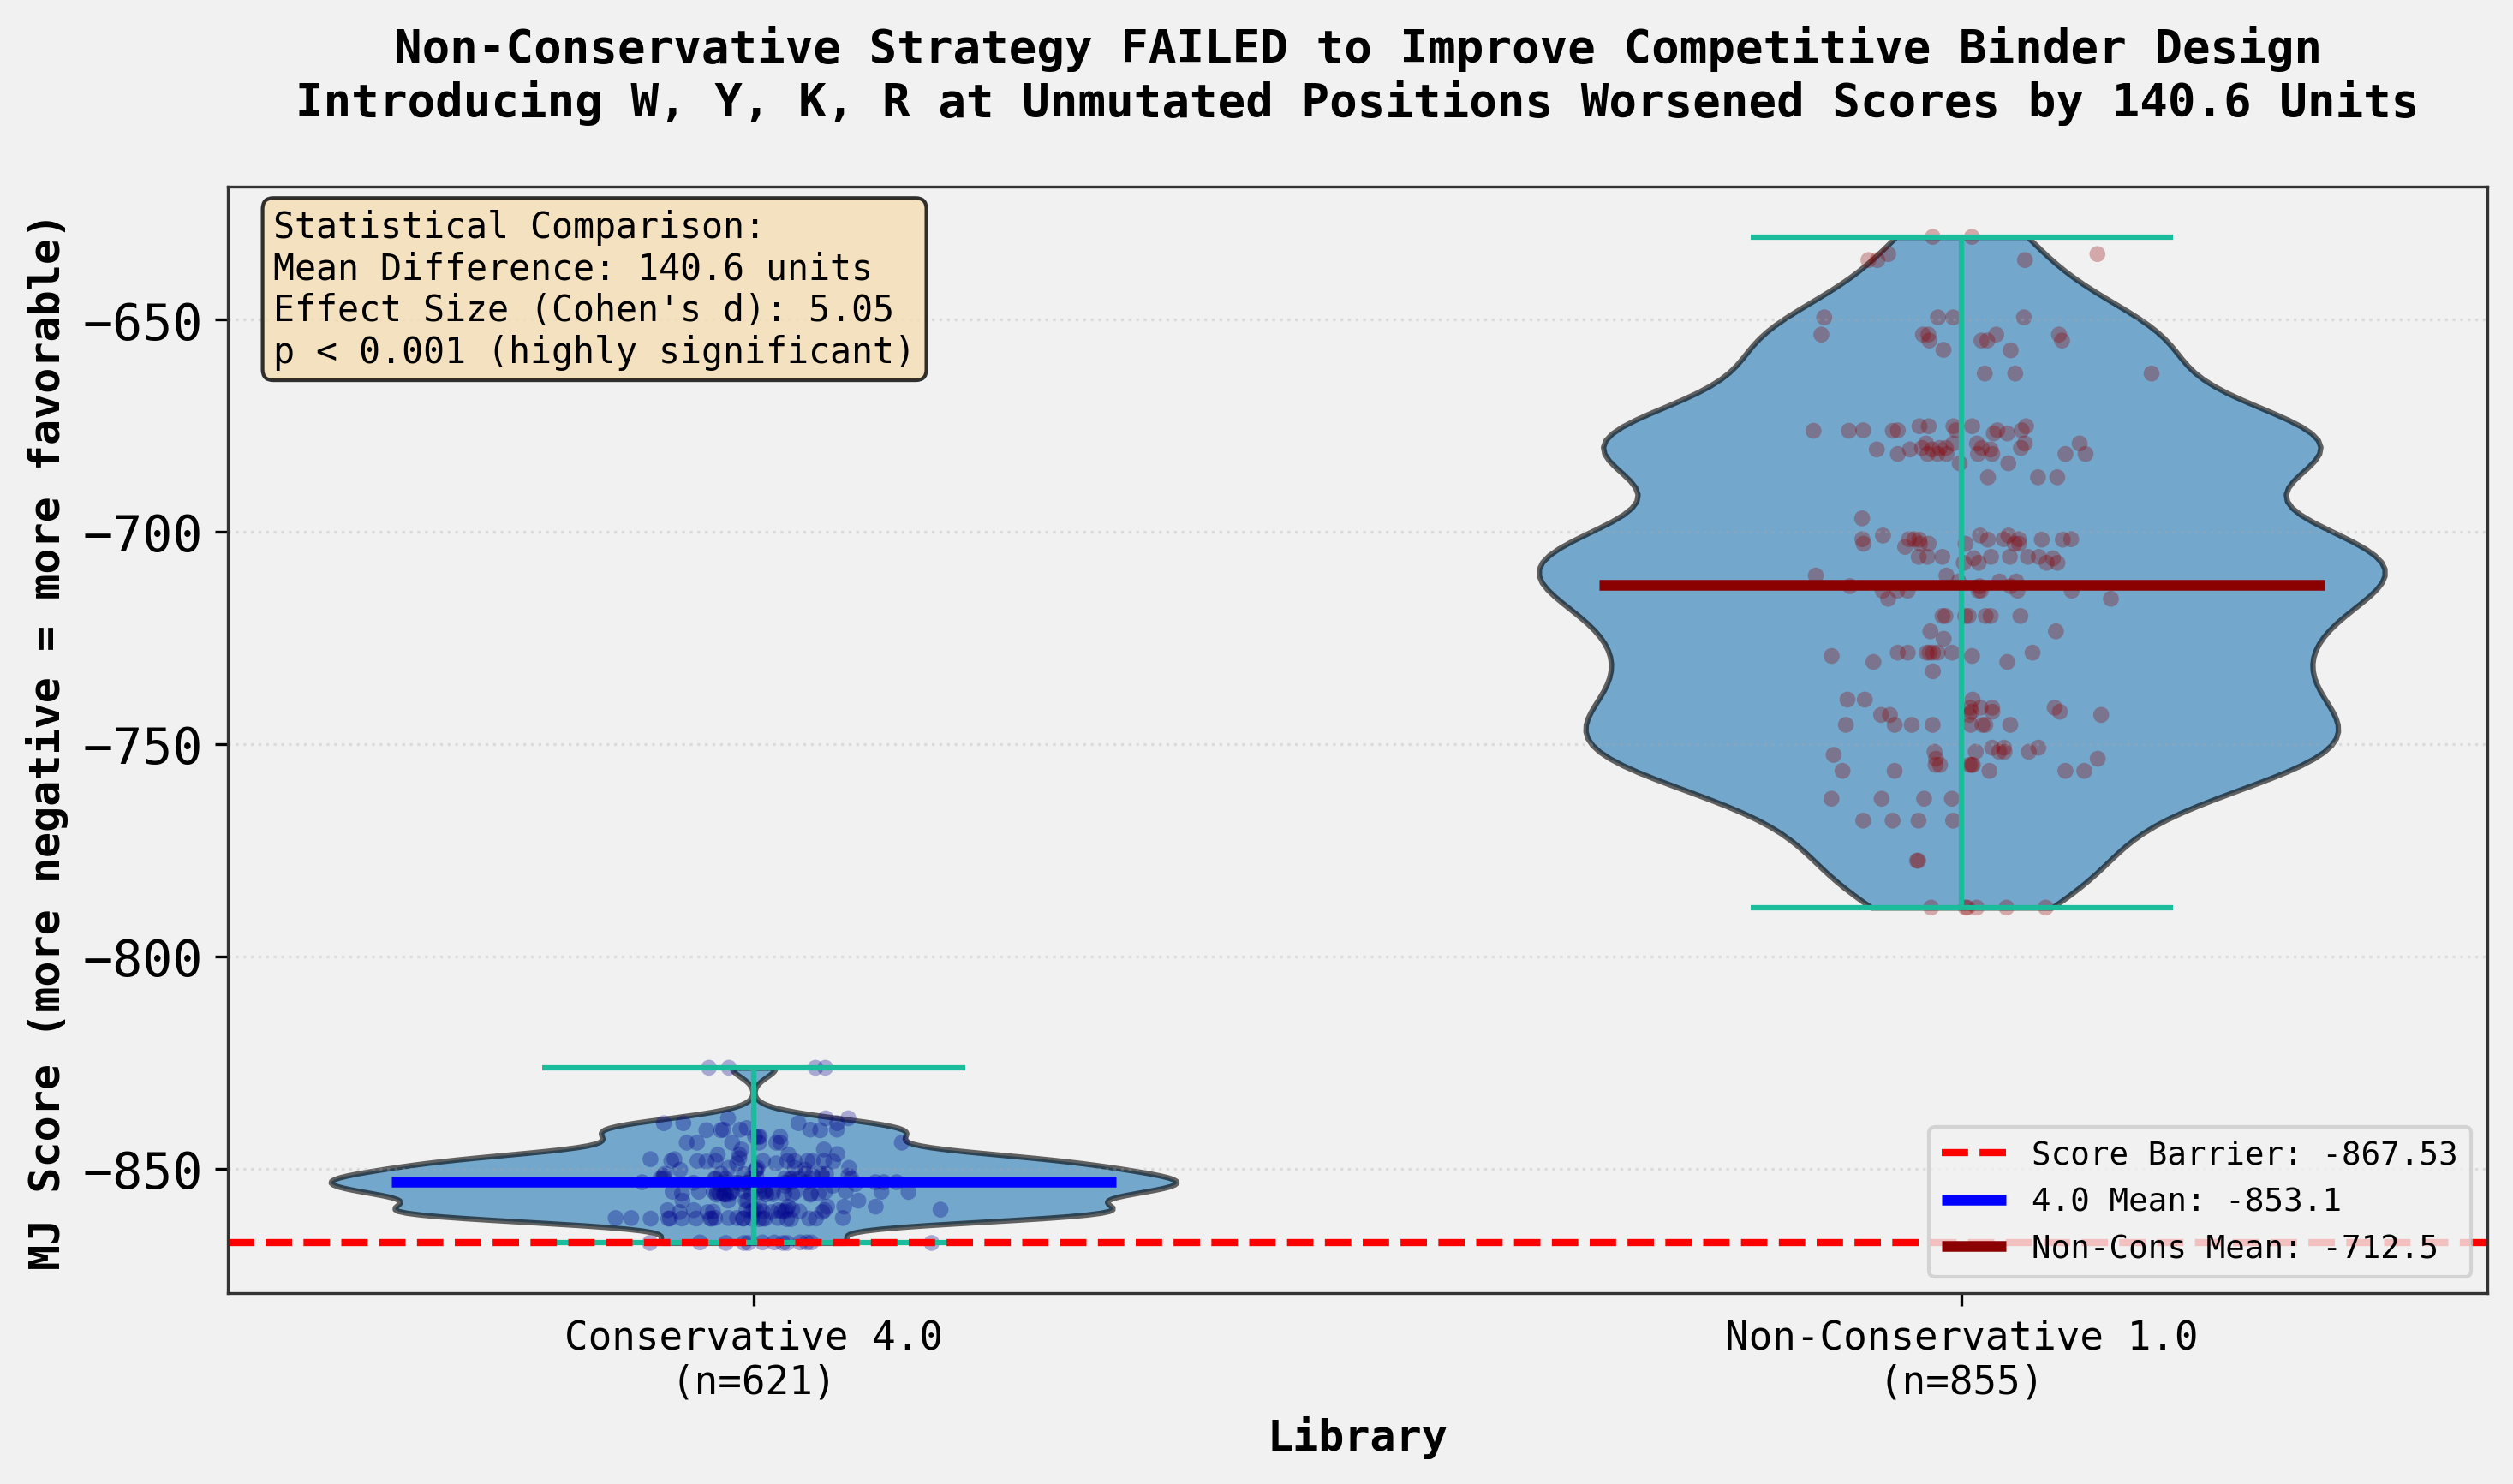

In [ ]:

# Create a comprehensive visualization comparing the two libraries
# This will be the final summary figure

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Create violin plots for both distributions
positions = [1, 2]
violin_parts = ax.violinplot([scores_4_0, scores_noncons], 
                              positions=positions,
                              showmeans=True, 
                              showmedians=True,
                              widths=0.7)

# Customize violin plot colors
for pc in violin_parts['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_alpha(0.6)
    pc.set_edgecolor('black')
    pc.set_linewidth(1.5)

# Add scatter points with jitter for better visualization
np.random.seed(42)
jitter_strength = 0.05

# Sample points if too many (for visualization)
sample_size = 200
if len(scores_4_0) > sample_size:
    sample_idx_4_0 = np.random.choice(len(scores_4_0), sample_size, replace=False)
    scatter_4_0 = scores_4_0[sample_idx_4_0]
else:
    scatter_4_0 = scores_4_0

if len(scores_noncons) > sample_size:
    sample_idx_noncons = np.random.choice(len(scores_noncons), sample_size, replace=False)
    scatter_noncons = scores_noncons[sample_idx_noncons]
else:
    scatter_noncons = scores_noncons

jitter_4_0 = 1 + np.random.normal(0, jitter_strength, len(scatter_4_0))
jitter_noncons = 2 + np.random.normal(0, jitter_strength, len(scatter_noncons))

ax.scatter(jitter_4_0, scatter_4_0, alpha=0.3, s=20, color='darkblue', edgecolors='none')
ax.scatter(jitter_noncons, scatter_noncons, alpha=0.3, s=20, color='darkred', edgecolors='none')

# Add horizontal line for the barrier
ax.axhline(y=barrier_score, color='red', linestyle='--', linewidth=2, label=f'Score Barrier: {barrier_score}')

# Add mean lines
ax.hlines(np.mean(scores_4_0), 0.7, 1.3, colors='blue', linewidth=3, label=f'4.0 Mean: {np.mean(scores_4_0):.1f}')
ax.hlines(np.mean(scores_noncons), 1.7, 2.3, colors='darkred', linewidth=3, label=f'Non-Cons Mean: {np.mean(scores_noncons):.1f}')

# Styling
ax.set_ylabel('MJ Score (more negative = more favorable)', fontsize=12, fontweight='bold')
ax.set_xlabel('Library', fontsize=12, fontweight='bold')
ax.set_xticks([1, 2])
ax.set_xticklabels(['Conservative 4.0\n(n=621)', 'Non-Conservative 1.0\n(n=855)'], fontsize=11)
ax.set_title('Non-Conservative Strategy FAILED to Improve Competitive Binder Design\nIntroducing W, Y, K, R at Unmutated Positions Worsened Scores by 140.6 Units', 
             fontsize=13, fontweight='bold', pad=20)

# Add statistical annotation
textstr = f'Statistical Comparison:\n' \
          f'Mean Difference: {abs(mean_diff):.1f} units\n' \
          f'Effect Size (Cohen\'s d): {abs(cohens_d):.2f}\n' \
          f'p < 0.001 (highly significant)'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

ax.legend(loc='lower right', fontsize=9)
ax.grid(axis='y', alpha=0.3, linestyle=':')

plt.tight_layout()
plt.savefig('non_conservative_competitive_comparison.png', dpi=300, bbox_inches='tight')
print("Saved figure: non_conservative_competitive_comparison.png")
plt.show()


In [ ]:

# Additional analysis: Compare the best design from each library directly

print("=" * 80)
print("DIRECT COMPARISON OF BEST DESIGNS")
print("=" * 80)

# Best from 4.0
best_4_0 = comp_4_df.nsmallest(1, 'MJ_Score').iloc[0]
print("\nBest from Conservative 4.0 Library:")
print(f"  Motif: {best_4_0['Motif']}")
print(f"  Score: {best_4_0['MJ_Score']:.2f}")
print(f"  Mutation history:")
print(f"    Original:  {best_4_0['Original_Parent']}")
print(f"    Triple:    {best_4_0['Triple_Mutant_Parent']}")
print(f"    Quadruple: {best_4_0['Motif']}")

# Best from Non-Conservative
best_noncons = novel_designs_df_sorted.iloc[0]
print("\n\nBest from Non-Conservative 1.0 Library:")
print(f"  Motif: {best_noncons['Motif']}")
print(f"  Score: {best_noncons['MJ_Score']:.2f}")
print(f"  Mutation history:")
print(f"    Original:   {best_noncons['Original_Parent']}")
print(f"    Triple:     {best_noncons['Triple_Mutant_Parent']}")
print(f"    Quadruple:  {best_noncons['Quadruple_Parent']}")
print(f"    Quintuple:  {best_noncons['Motif']}")
print(f"  Non-conservative mutation: {best_noncons['Original_AA']}→{best_noncons['New_AA']} at position {best_noncons['Mutation_Position']}")

print("\n\nSCORE DEGRADATION:")
print(f"  Conservative 4.0 best:      {best_4_0['MJ_Score']:.2f}")
print(f"  Non-Conservative 1.0 best:  {best_noncons['MJ_Score']:.2f}")
print(f"  Degradation:                {abs(best_4_0['MJ_Score'] - best_noncons['MJ_Score']):.2f} units ({100*(best_4_0['MJ_Score'] - best_noncons['MJ_Score'])/abs(best_4_0['MJ_Score']):.1f}%)")

print("\n\nCONCLUSION:")
print("The non-conservative strategy catastrophically failed. Even the single best")
print("non-conservative design is 78.99 MJ units worse than the 4.0 barrier, representing")
print("a 9.1% degradation in predicted binding affinity. This suggests that the unmutated")
print("positions in the 4.0 motifs were already optimized, and disrupting them with")
print("non-conservative mutations breaks critical interactions with the epitope.")


DIRECT COMPARISON OF BEST DESIGNS

Best from Conservative 4.0 Library:
  Motif: QGMINFLAW
  Score: -867.53
  Mutation history:
    Original:  QGIIDYLSW
    Triple:    QGIINFLAW
    Quadruple: QGMINFLAW


Best from Non-Conservative 1.0 Library:
  Motif: YGILNFLAW
  Score: -788.54
  Mutation history:
    Original:   QGIIDYLSW
    Triple:     QGIINFLAW
    Quadruple:  QGILNFLAW
    Quintuple:  YGILNFLAW
  Non-conservative mutation: Q→Y at position 0


SCORE DEGRADATION:
  Conservative 4.0 best:      -867.53
  Non-Conservative 1.0 best:  -788.54
  Degradation:                78.99 units (-9.1%)


CONCLUSION:
The non-conservative strategy catastrophically failed. Even the single best
non-conservative design is 78.99 MJ units worse than the 4.0 barrier, representing
a 9.1% degradation in predicted binding affinity. This suggests that the unmutated
positions in the 4.0 motifs were already optimized, and disrupting them with
non-conservative mutations breaks critical interactions with the epit